In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data_dir = r'D:\Dataset'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 7188 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


In [4]:
# Pembuatan Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Output layer dengan 3 kelas
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)




Epoch 1/10


224/224 [==============================] - 80s 353ms/step - loss: 0.3855 - accuracy: 0.8512 - val_loss: 0.1955 - val_accuracy: 0.9275
Epoch 2/10
224/224 [==============================] - 76s 340ms/step - loss: 0.1628 - accuracy: 0.9405 - val_loss: 0.2101 - val_accuracy: 0.9275
Epoch 3/10
224/224 [==============================] - 75s 335ms/step - loss: 0.1364 - accuracy: 0.9550 - val_loss: 0.1496 - val_accuracy: 0.9503
Epoch 4/10
224/224 [==============================] - 73s 328ms/step - loss: 0.1006 - accuracy: 0.9660 - val_loss: 0.1138 - val_accuracy: 0.9604
Epoch 5/10
224/224 [==============================] - 74s 330ms/step - loss: 0.0827 - accuracy: 0.9740 - val_loss: 0.1108 - val_accuracy: 0.9671
Epoch 6/10
224/224 [==============================] - 72s 322ms/step - loss: 0.0684 - accuracy: 0.9771 - val_loss: 0.0959 - val_accuracy: 0.9671
Epoch 7/10
224/224 [==============================] - 74s 330ms/step - loss: 0.0659 - accuracy: 0.9768 - val_loss: 0.0818 - v

In [5]:
# Evaluasi Model
test_loss, test_acc = model.evaluate(validation_generator)
print('Validation accuracy:', test_acc)

57/57 [==============================] - 9s 159ms/step - loss: 0.0932 - accuracy: 0.9710
Validation accuracy: 0.9710144996643066


In [6]:
# Prediksi
test_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

predictions = model.predict(test_generator, steps=test_generator.samples)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(train_generator.class_indices.keys())

Found 8982 images belonging to 3 classes.
8982/8982 [==============================] - 58s 6ms/step


mask_weared_incorrect\1.png - Predicted Class: mask_weared_incorrect
mask_weared_incorrect\10.png - Predicted Class: mask_weared_incorrect
mask_weared_incorrect\100.png - Predicted Class: mask_weared_incorrect
mask_weared_incorrect\1000.png - Predicted Class: mask_weared_incorrect
mask_weared_incorrect\1001.png - Predicted Class: mask_weared_incorrect
mask_weared_incorrect\1002.png - Predicted Class: mask_weared_incorrect
mask_weared_incorrect\1003.png - Predicted Class: mask_weared_incorrect
mask_weared_incorrect\1004.png - Predicted Class: mask_weared_incorrect
mask_weared_incorrect\1005.png - Predicted Class: mask_weared_incorrect
mask_weared_incorrect\1006.png - Predicted Class: mask_weared_incorrect
mask_weared_incorrect\1007.png - Predicted Class: mask_weared_incorrect
mask_weared_incorrect\1008.png - Predicted Class: mask_weared_incorrect
mask_weared_incorrect\1009.png - Predicted Class: mask_weared_incorrect
mask_weared_incorrect\101.png - Predicted Class: mask_weared_incorrect

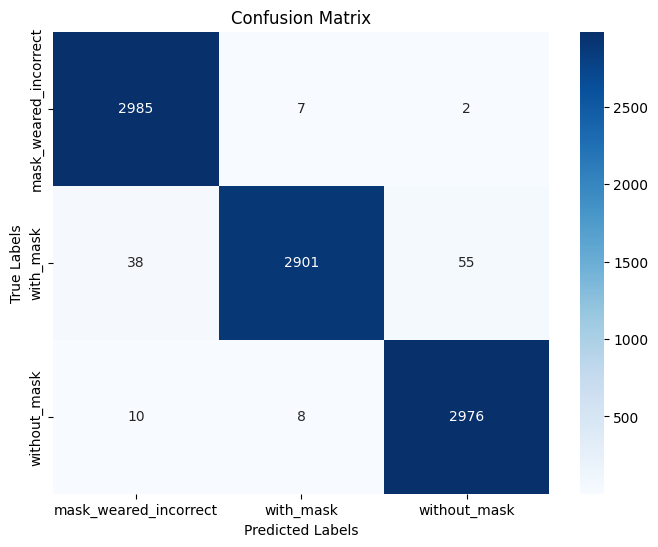

In [7]:
# Print hasil prediksi
for i, image in enumerate(test_generator.filenames):
    print(f"{image} - Predicted Class: {class_labels[predicted_classes[i]]}")

# Hitung confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Tampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()